C:\Users\fjsantos\AppData\Local\Temp\ipykernel_17916\1998765377.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empleados_df = pd.read_sql("SELECT * FROM empleados", get_db_connection())
C:\Users\fjsantos\AppData\Local\Temp\ipykernel_17916\1998765377.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  proyectos_df = pd.read_sql("SELECT * FROM proyectos", get_db_connection())
C:\Users\fjsantos\AppData\Local\Temp\ipykernel_17916\1998765377.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empPro_df = pd.read_sql("SEL



Top 5 empleados que más años llevan en la compañía
   nombre  años_en_empresa
     José         4.542466
 Cristina         4.460274
José Luis         3.739726
   Miguel         3.706849
 Fernando         3.583562



Top 5 empleados más recientes
 nombre     f_alta
 Javier 2023-04-10
  Lucía 2023-03-20
Antonio 2023-02-15
  Pedro 2023-02-01
   Juan 2023-01-10



Distribución del número de años de los empleados en la empresa


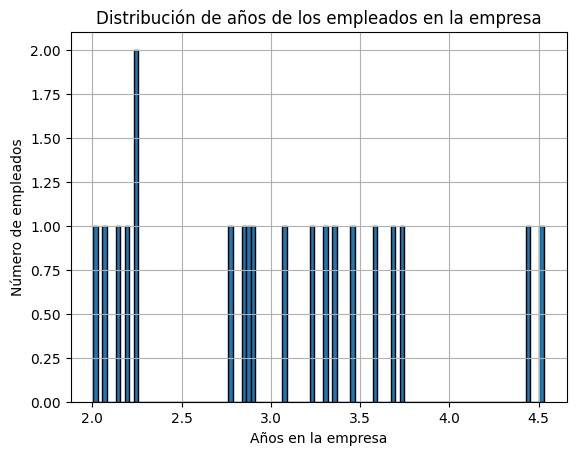




Evolución temporal de altas por años


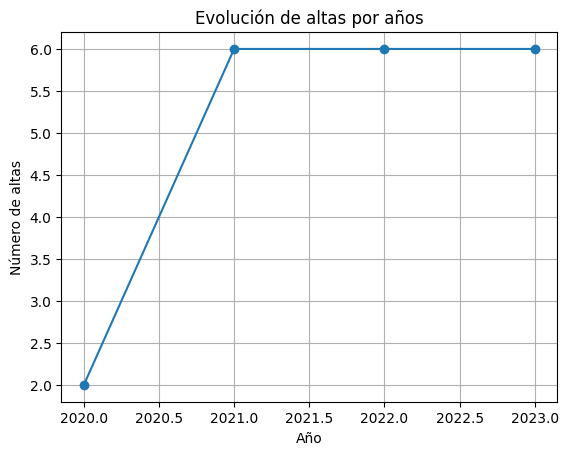




Evolución temporal de bajas por años


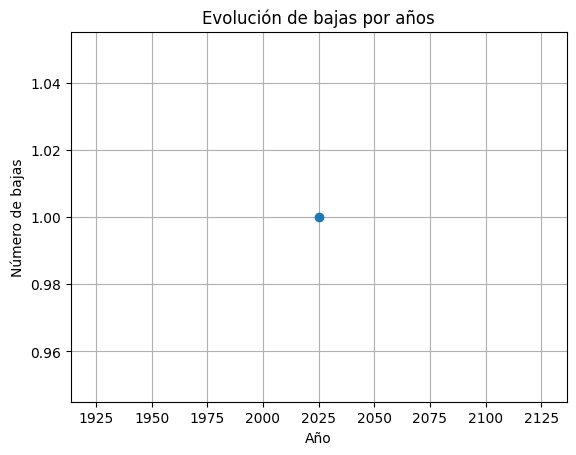




Años de mayor crecimiento/decrecimiento de empleados
Año de mayor crecimiento: 2021
Año de mayor decrecimiento: 2022



Distribución de empleados solteros vs casados


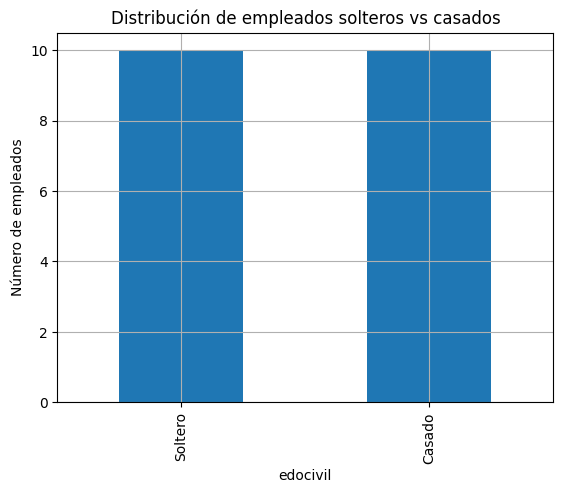




Distribución de la edad de los empleados


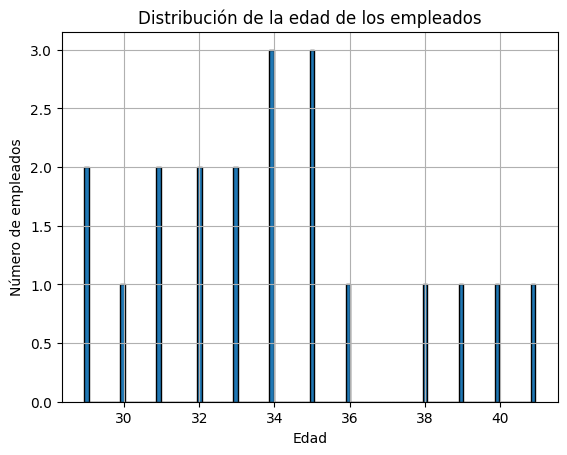




Edad media y desviación típica de los empleados
Edad media de los empleados: 34.05 años
Desviación típica de la edad de los empleados: 3.46 años



Número de proyectos activos, finalizados y total
Proyectos activos: 0
Proyectos finalizados: 10
Total de proyectos: 10



Distribución de la duración de los proyectos


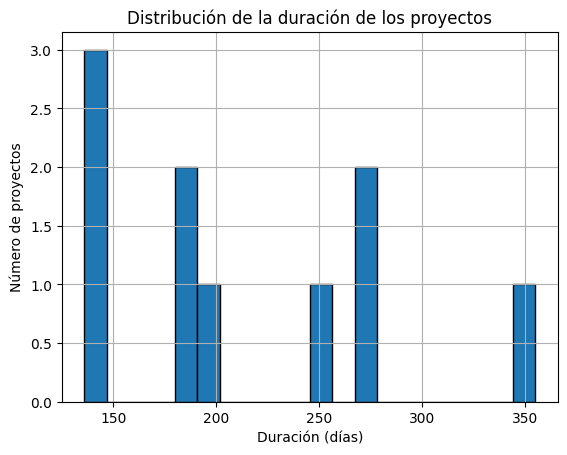




Distribución de proyectos por lugar


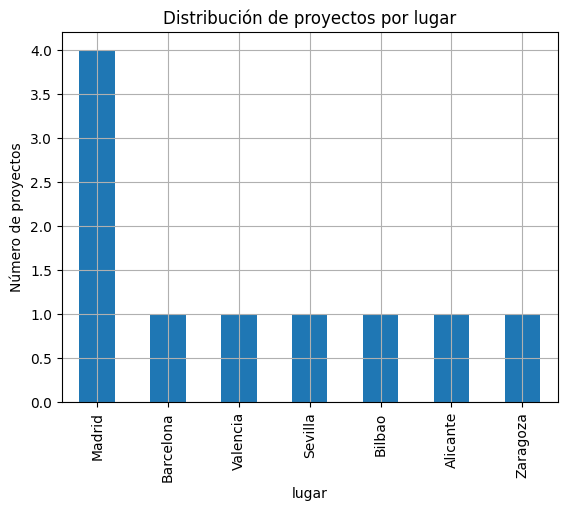




Distribución del número de proyectos asignados a empleados activos
No hay empleados activos asignados a ningún proyecto.



Top 5 proyectos con más personas asignadas:
No hay proyectos con personas asignadas.



Proyectos sin personas
 id_proyecto                                           descripcion
           1            Implementación de ERP en empresa logística
           2               Desarrollo de plataforma e-commerce B2B
           3              Reforma integral de edificio de oficinas
           4                      Migración de servicios a la nube
           5         Instalación de planta fotovoltaica industrial
           6 Desarrollo de aplicación móvil para transporte urbano
           7       Implementación de sistema de control de calidad
           8      Campaña de digitalización de archivos históricos
           9       Despliegue de red de fibra óptica en zona rural
          10                Automatización de líneas de producción





In [3]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# Conexión a la base de datos
def get_db_connection():
    conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='1234',
        database='PRACTICA'
    )
    return conn

# Leer las tablas y crear los dataframes de pandas
empleados_df = pd.read_sql("SELECT * FROM empleados", get_db_connection())
proyectos_df = pd.read_sql("SELECT * FROM proyectos", get_db_connection())
empPro_df = pd.read_sql("SELECT * FROM empleados_proyecto", get_db_connection())

#Top 5 empleados que más años llevan en la compañía
print("\n\nTop 5 empleados que más años llevan en la compañía")
empleados_df['f_alta'] = pd.to_datetime(empleados_df['f_alta'])#Parsear a tipo datetime para poder hacer los calculos
#Restamos la fecha de alta a la fecha actual y la dividimos entre 365 para obtner los años dados de alta de cada empleado
empleados_df['años_en_empresa'] = (pd.to_datetime('today') - empleados_df['f_alta']).dt.days / 365 #Restamos la fecha de alta a la fecha actual
#Muestra los 5 con mas años dados de alta
top_5_antiguos = empleados_df.nlargest(5, 'años_en_empresa')
print(top_5_antiguos[['nombre', 'años_en_empresa']].to_string(index=False))
print("\n\n")

#Top 5 empleados más recientes
print("Top 5 empleados más recientes")
#Muestra una tabla de los 5 empleados con fecha de alta mas reciente
top_5_recientes = empleados_df.nlargest(5, 'f_alta')
print(top_5_recientes[['nombre', 'f_alta']].to_string(index=False))
print("\n\n")

#Distribución del número de años de los empleados en la empresa
print("Distribución del número de años de los empleados en la empresa")
#Creamos un grafico que muestra cuántos empleados hay según sus años de antigüedad.
plt.hist(empleados_df['años_en_empresa'], bins=100, edgecolor='black', align='left')
plt.title('Distribución de años de los empleados en la empresa')
plt.xlabel('Años en la empresa')
plt.ylabel('Número de empleados')
plt.grid(True)
plt.show()
print("\n\n")

#Evolución temporal de altas por años
print("Evolución temporal de altas por años")
#Sacamos el año de alta y agrupamos por año para contar cuantos empleados se unieron cada año
empleados_df['Año_alta'] = empleados_df['f_alta'].dt.year
evolucion_altas = empleados_df.groupby('Año_alta').size()
if not evolucion_altas.empty:
    plt.plot(evolucion_altas.index, evolucion_altas.values, marker='o')
    plt.title('Evolución de altas por años')
    plt.xlabel('Año')
    plt.ylabel('Número de altas')
    plt.grid(True)
    plt.show()
else:
    print("No hay empleados dados de alta para mostrar en el gráfico.")
print("\n\n")

# Evolución temporal de bajas por años
print("Evolución temporal de bajas por años")
#  Ponemos f_baja en formato datetime
empleados_df['f_baja'] = pd.to_datetime(empleados_df['f_baja'], errors='coerce')
# Filtramos empleados con baja
empleados_baja = empleados_df[empleados_df['f_baja'].notna()].copy()
empleados_baja['Año_baja'] = empleados_baja['f_baja'].dt.year
# Agrupamos por año de baja
evolucion_bajas = empleados_baja.groupby('Año_baja').size()
if not evolucion_bajas.empty:
    plt.plot(evolucion_bajas.index, evolucion_bajas.values, marker='o')
    plt.title('Evolución de bajas por años')
    plt.xlabel('Año')
    plt.ylabel('Número de bajas')
    plt.grid(True)
    plt.show()
else:
    print("No hay empleados dados de baja para mostrar en el gráfico.")
print("\n\n")

# Años de mayor crecimiento/decrecimiento de empleados
print("Años de mayor crecimiento/decrecimiento de empleados")
empleados_df['Año_alta'] = empleados_df['f_alta'].dt.year
altas_por_ano = empleados_df.groupby('Año_alta').size() # Sacar las altas por año
# Calcular el crecimiento entre años
altas_por_ano_diff = altas_por_ano.diff().dropna() # Diferencia de empleados entre años
mayor_crecimiento = altas_por_ano_diff.idxmax() # Año con mayor crecimiento
mayor_decrecimiento = altas_por_ano_diff.idxmin() # Año con mayor disminución
# Imprimir los resultados
print(f"Año de mayor crecimiento: {mayor_crecimiento}")
print(f"Año de mayor decrecimiento: {mayor_decrecimiento}")
print("\n\n")

#Distribución de empleados solteros vs casados
print("Distribución de empleados solteros vs casados")
empleados_df['edocivil'] = empleados_df['edocivil'].map({'S': 'Soltero', 'C': 'Casado'}) 
empleados_df['edocivil'].value_counts().plot(kind='bar', title='Distribución de empleados solteros vs casados')
plt.ylabel('Número de empleados')
plt.grid(True)
plt.show()
print("\n\n")

#Distribución de la edad de los empleados
print("Distribución de la edad de los empleados")
empleados_df['f_nacimiento'] = pd.to_datetime(empleados_df['f_nacimiento']) # Convertir fecha de nacimiento a datetime
empleados_df['edad'] = (pd.to_datetime('today') - empleados_df['f_nacimiento']).dt.days / 365 # Calcular edad
empleados_df['edad'] = empleados_df['edad'].round(0)
# Crear el grafico
plt.hist(empleados_df['edad'], bins=100, edgecolor='black', align='left')
plt.title('Distribución de la edad de los empleados')
plt.xlabel('Edad')
plt.ylabel('Número de empleados')
plt.grid(True)
plt.show()
print("\n\n")

#Edad media y desviación típica de los empleados
print("Edad media y desviación típica de los empleados")
edad_media = empleados_df['edad'].mean()
desviacion_tipica = empleados_df['edad'].std()
# Imprimir los resultados
print(f"Edad media de los empleados: {edad_media:.2f} años")
print(f"Desviación típica de la edad de los empleados: {desviacion_tipica:.2f} años")
print("\n\n")


#Número de proyectos activos, finalizados y total
print("Número de proyectos activos, finalizados y total")
proyectos_df['f_fin'] = pd.to_datetime(proyectos_df['f_fin'], errors='coerce')
# Filtrar proyectos activos (sin fecha de finalización o con fecha futura)
proyectos_activados = proyectos_df[proyectos_df['f_fin'].isna() | (proyectos_df['f_fin'] > pd.Timestamp('today'))].shape[0]
# Filtrar proyectos finalizados (con fecha de finalización pasada)
proyectos_finalizados = proyectos_df[proyectos_df['f_fin'].notna() & (proyectos_df['f_fin'] <= pd.Timestamp('today'))].shape[0]
# Total de proyectos
total_proyectos = proyectos_df.shape[0]
# Imprimir los resultados
print(f"Proyectos activos: {proyectos_activados}")
print(f"Proyectos finalizados: {proyectos_finalizados}")
print(f"Total de proyectos: {total_proyectos}")
print("\n\n")


#Distribución de la duración de los proyectos
print("Distribución de la duración de los proyectos")
proyectos_df['f_inicio'] = pd.to_datetime(proyectos_df['f_inicio'])
proyectos_df['f_fin'] = pd.to_datetime(proyectos_df['f_fin'])
proyectos_df['duracion'] = (proyectos_df['f_fin'] - proyectos_df['f_inicio']).dt.days

plt.hist(proyectos_df['duracion'], bins=20, edgecolor='black')
plt.title('Distribución de la duración de los proyectos')
plt.xlabel('Duración (días)')
plt.ylabel('Número de proyectos')
plt.grid(True)
plt.show()
print("\n\n")

#Distribución de proyectos por lugar
print("Distribución de proyectos por lugar")
proyectos_df['lugar'].value_counts().plot(kind='bar', title='Distribución de proyectos por lugar')
plt.ylabel('Número de proyectos')
plt.grid(True)
plt.show()
print("\n\n")

#Distribución del número de proyectos asignados a empleados activos
print("Distribución del número de proyectos asignados a empleados activos")
# Filtrar empleados activos
empleados_activos = empleados_df[empleados_df['f_baja'].isna()]
# Filtrar proyectos con empleados activos
proyectos_con_activos = empPro_df[empPro_df['id_empleado'].isin(empleados_activos['id_empleado'])]
# Hacer el grafico si hay empleados activos asignados a proyectos
if not proyectos_con_activos.empty:
    # Contar cuántos empleados activos hay por proyecto
    empleados_por_proyecto = proyectos_con_activos.groupby('id_proyecto').size()
    if not empleados_por_proyecto.empty:
        empleados_por_proyecto.sort_index().plot(kind='bar', title='Número de empleados activos por proyecto')
        plt.xlabel('ID del proyecto')
        plt.ylabel('Número de empleados')
        plt.grid(True)
        plt.show()
    else:
        print("No hay ningún empleado activo asignado a ningún proyecto.")
else:
    print("No hay empleados activos asignados a ningún proyecto.")
print("\n\n")

# Top 5 proyectos con más personas asignadas
print("Top 5 proyectos con más personas asignadas:")
# Agrupar por proyecto y contar empleados
top_5_proyectos = empPro_df.groupby('id_proyecto').size().nlargest(5)
# Convertir a DataFrame
top_5_df = top_5_proyectos.reset_index(name='n_personas')
# Comprobar si hay datos
if not top_5_df.empty:
    print(top_5_df.to_string(index=False))
else:
    print("No hay proyectos con personas asignadas.")
print("\n\n")


#Lista de proyectos sin personas asignadas
# Encontrar proyectos sin empleados asignados
print("Proyectos sin personas")
proyectos_sin_personas = proyectos_df[~proyectos_df['id_proyecto'].isin(empPro_df['id_proyecto'])]
if not proyectos_sin_personas.empty:
    # Imprimir los proyectos sin personas asignadas
    print(proyectos_sin_personas[['id_proyecto', 'descripcion']].to_string(index=False))
else:
    print("Todos los proyectos tienen empleados asignados")
print("\n\n")
